## Maximum Inscribed Ball in a Polyhedron

In [1]:
import numpy as np
import cvxpy as cp

In [6]:
# Simple Example: regular polygon centered at the origin
m = 5 # Number of sides of the polygon
n = 2 # Dimension (2D)

# Trick to get a regular polygon
thetas = np.linspace(0, 2*np.pi, m)
A = np.column_stack([np.cos(thetas), np.sin(thetas)]) # Plane normals
b = np.ones(m) # Plane offsets from the origin

In [7]:
# Make variables
center = cp.Variable(n)

radius = cp.Variable()

In [8]:
# Form the objective function and constraints
objective = cp.Maximize(
    radius
)
# cp.Minimize()

In [10]:
constraints = [A @ center + radius * cp.norm(A, axis=1) <= b, radius >= 0]

In [12]:
# Construct and Solve the problem
prob = cp.Problem(objective, constraints)

# Use ECOS (default) -- super fast for simple problems
# CLARABEL - all comprehesneive, where CVX is moving
prob.solve(solver='ECOS')

0.9999999999456769

In [13]:
print("Optimal radius: ", radius.value)
print("Optimal center: ", center.value)
print("Solve time: ", prob.solver_stats.solve_time)

Optimal radius:  0.9999999999456769
Optimal center:  [-3.57049574e-11 -1.91186119e-16]
Solve time:  3.066e-05


In [14]:
1/3e-5

33333.333333333336

### DPP - Displined Parameterized Programming

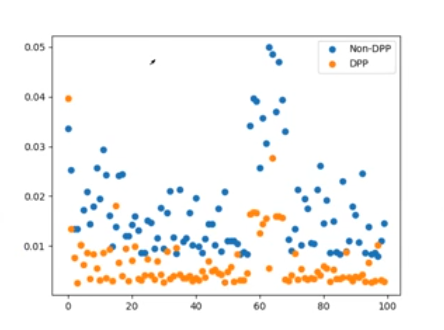